<a href="https://colab.research.google.com/github/ednei-code/analise-observacional-exoplanetas/blob/main/explanetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseado no NASA Exoplanet Archive  
Autor: **Ednei Cunha Vicente**  
Profissão: **Cientista de Dados**  

# 📊 Exoplanetas Confirmados  
## Uma Análise Exploratória e Visual do Espaço Observacional


## Contexto Científico

A detecção de exoplanetas é um processo fundamentalmente observacional, condicionado
pelas capacidades instrumentais, pelos métodos de detecção e pelas estratégias de
observação disponíveis em diferentes períodos históricos.

Os catálogos de exoplanetas confirmados refletem não apenas propriedades físicas dos
sistemas planetários, mas também os limites impostos pela tecnologia observacional.
Assim, os padrões observados devem ser interpretados como **padrões observacionais**,
e não como representações diretas da população planetária subjacente.

Este projeto adota uma abordagem de **Análise Exploratória de Dados (EDA)** e
**visualização científica**, sem o uso de modelos de machine learning, com foco na
interpretação cuidadosa dos padrões observados e de seus vieses.


## Fonte de Dados

Os dados utilizados neste projeto são provenientes do **NASA Exoplanet Archive**,
um dos repositórios mais utilizados na literatura para acesso a exoplanetas confirmados
e seus parâmetros observacionais associados.

## Objetivo Geral

Explorar e caracterizar padrões observacionais no catálogo de exoplanetas confirmados,
avaliando como métodos de detecção, propriedades físicas observadas e evolução temporal
moldam o espaço de parâmetros efetivamente amostrado.

## Pergunta Central

Como os padrões observacionais presentes no catálogo de exoplanetas confirmados refletem
a interação entre propriedades físicas observadas e a evolução histórica dos métodos de
detecção astronômica?

## Perguntas Secundárias de Pesquisa

1. Como o número de exoplanetas confirmados e a contribuição relativa dos métodos de detecção evoluíram ao longo do tempo?
2. Quais regimes observacionais de período orbital são predominantemente amostrados por cada método de detecção?
3. As distribuições observacionais de períodos orbitais mudaram ao longo do tempo com o avanço instrumental?
4. Como as propriedades estelares se distribuem entre os diferentes métodos de detecção?
5. Quais regiões do espaço de parâmetros apresentam maior densidade observacional e quais permanecem pouco exploradas?
6. Como incertezas e limites instrumentais condicionam a interpretação dos padrões observados?


## Limitações do Estudo

Trata-se de um estudo observacional baseado em dados de catálogo, sujeito a vieses
observacionais, incompletudes e incertezas associadas às medições. As conclusões são
restritas à interpretação exploratória e visual dos dados analisados.

## Organização do Projeto

As perguntas secundárias serão abordadas progressivamente ao longo das etapas de análise
exploratória e visualização, enquanto a pergunta central será respondida de forma integrada
ao final do projeto.


In [43]:
# ==========================================
# Bibliotecas do Projeto
# ==========================================

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais
import warnings
warnings.filterwarnings("ignore")

# ==========================================
# Estilo visual — seaborn darkgrid
# ==========================================

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("deep")

print("Estilo visual configurado (seaborn darkgrid).")

# ==========================================
# Configurações do pandas
# ==========================================

pd.set_option("display.max_columns", 60)
pd.set_option("display.width", 120)

print("Bibliotecas carregadas com sucesso.")

Estilo visual configurado (seaborn darkgrid).
Bibliotecas carregadas com sucesso.


In [44]:
file_path = "/content/sample_data/ex_data.csv.csv"

df = pd.read_csv(file_path)

print("Dataset carregado com sucesso a partir do snapshot local.")
print("Dimensão do DataFrame (linhas, colunas):", df.shape)

df.head()


Dataset carregado com sucesso a partir do snapshot local.
Dimensão do DataFrame (linhas, colunas): (4126, 72)


,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,...,dec,st_dist,st_disterr1,st_disterr2,st_distlim,gaia_dist,gaia_disterr1,gaia_disterr2,gaia_distlim,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_mass,st_masserr1,st_masserr2,st_masslim,st_rad,st_raderr1,st_raderr2,st_radlim,rowupdate,pl_facility
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.03000,0.32,-0.32,0.0,1.29,0.05,-0.05,0.0,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,19.40,1.50,-1.50,0.0,Msini,NaN,NaN,NaN,...,17.792868,93.37,1.92,-1.92,0.0,93.37,1.92,-1.92,0.0,4.740,NaN,0.0,V (Johnson),4.372,NaN,0.0,4742.0,100.0,-100.0,0.0,2.70,0.30,-0.30,0.0,19.00,2.00,-2.00,0.0,2014-05-14,Xinglong Station
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.21997,3.20,-3.20,0.0,1.53,0.07,-0.07,0.0,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,0.0,14.74,2.50,-2.50,0.0,Msini,NaN,NaN,NaN,...,71.823898,125.72,1.97,-1.97,0.0,125.72,1.97,-1.97,0.0,5.016,0.009,0.0,V (Johnson),4.500,NaN,0.0,4213.0,46.0,-46.0,0.0,2.78,0.69,-0.69,0.0,29.79,2.84,-2.84,0.0,2018-09-06,Thueringer Landessternwarte Tautenburg
2,14 And,b,14 And b,Radial Velocity,0,1,185.84000,0.23,-0.23,0.0,0.83,NaN,NaN,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.80,NaN,NaN,0.0,Msini,NaN,NaN,NaN,...,39.236198,75.59,0.71,-0.71,0.0,75.59,0.71,-0.71,0.0,5.227,0.009,0.0,V (Johnson),4.872,NaN,0.0,4813.0,20.0,-20.0,0.0,2.20,0.10,-0.20,0.0,11.00,1.00,-1.00,0.0,2014-05-14,Okayama Astrophysical Observatory
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.40002,2.50,-2.50,0.0,2.93,0.08,-0.08,0.0,0.370,0.000,0.000,0.0,NaN,NaN,NaN,0.0,4.66,0.15,-0.15,0.0,Msini,NaN,NaN,NaN,...,43.817646,17.94,0.01,-0.01,0.0,17.94,0.01,-0.01,0.0,6.610,0.020,0.0,V (Johnson),6.379,NaN,0.0,5338.0,25.0,-25.0,0.0,0.90,0.04,-0.04,0.0,0.93,0.01,-0.01,0.0,2018-09-06,W. M. Keck Observatory
4,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.50000,1.00,-1.00,0.0,1.66,0.03,-0.03,0.0,0.680,0.020,-0.020,0.0,NaN,NaN,NaN,0.0,1.78,0.08,-0.08,0.0,Msini,NaN,NaN,NaN,...,50.517525,21.15,0.01,-0.01,0.0,21.15,0.01,-0.01,0.0,6.250,NaN,0.0,V (Johnson),6.057,NaN,0.0,5750.0,8.0,-8.0,0.0,1.08,0.04,-0.04,0.0,1.13,0.01,-0.01,0.0,2018-09-06,Multiple Observatories


## PASSO 3 — Definição do Espaço de Análise e Dicionário de Dados

Objetivo deste passo:
Definir explicitamente o espaço de análise do projeto e documentar o significado das
variáveis relevantes para o escopo da análise exploratória.

Dada a extensão do catálogo de exoplanetas confirmados, o dicionário de dados é
apresentado de forma seletiva, priorizando variáveis centrais, variáveis observacionais
de apoio e metadados essenciais. As demais colunas são mantidas para rastreabilidade,
mas não descritas individualmente neste momento.


In [45]:
# ==========================================
# Visão geral das colunas do dataset
# ==========================================

len(df.columns), df.columns.tolist()


(72,
 ['pl_hostname',
  'pl_letter',
  'pl_name',
  'pl_discmethod',
  'pl_controvflag',
  'pl_pnum',
  'pl_orbper',
  'pl_orbpererr1',
  'pl_orbpererr2',
  'pl_orbperlim',
  'pl_orbsmax',
  'pl_orbsmaxerr1',
  'pl_orbsmaxerr2',
  'pl_orbsmaxlim',
  'pl_orbeccen',
  'pl_orbeccenerr1',
  'pl_orbeccenerr2',
  'pl_orbeccenlim',
  'pl_orbincl',
  'pl_orbinclerr1',
  'pl_orbinclerr2',
  'pl_orbincllim',
  'pl_bmassj',
  'pl_bmassjerr1',
  'pl_bmassjerr2',
  'pl_bmassjlim',
  'pl_bmassprov',
  'pl_radj',
  'pl_radjerr1',
  'pl_radjerr2',
  'pl_radjlim',
  'pl_dens',
  'pl_denserr1',
  'pl_denserr2',
  'pl_denslim',
  'pl_ttvflag',
  'pl_kepflag',
  'pl_k2flag',
  'pl_nnotes',
  'ra_str',
  'ra',
  'dec_str',
  'dec',
  'st_dist',
  'st_disterr1',
  'st_disterr2',
  'st_distlim',
  'gaia_dist',
  'gaia_disterr1',
  'gaia_disterr2',
  'gaia_distlim',
  'st_optmag',
  'st_optmagerr',
  'st_optmaglim',
  'st_optband',
  'gaia_gmag',
  'gaia_gmagerr',
  'gaia_gmaglim',
  'st_teff',
  'st_tefferr1

### Variáveis Centrais do Estudo

As seguintes variáveis constituem o núcleo analítico do projeto, sendo utilizadas
diretamente nas análises exploratórias e visualizações.

- **pl_orbper** — Período orbital do exoplaneta, em dias.
- **pl_rade** — Raio do exoplaneta, em unidades de raios terrestres.
- **pl_bmasse** — Massa do exoplaneta (ou limite mínimo), em massas terrestres.
- **disc_year** — Ano de descoberta do exoplaneta.

Essas variáveis definem o espaço físico-observacional básico para a caracterização
dos exoplanetas confirmados.


### Variáveis Observacionais de Apoio

Variáveis utilizadas para estratificação, comparação e contextualização dos padrões
observados, mas que não constituem o espaço primário de análise.

- **discoverymethod** — Método de detecção do exoplaneta (ex.: Transit, Radial Velocity).
- **hostname** — Nome da estrela hospedeira.
- **sy_dist** — Distância do sistema ao Sol, em parsecs.
- **st_mass** — Massa da estrela hospedeira, em massas solares.
- **st_rad** — Raio da estrela hospedeira, em raios solares.

Essas variáveis permitem avaliar como os padrões observacionais dependem de métodos
de detecção e propriedades estelares.


### Metadados e Variáveis Fora do Escopo

As demais colunas do catálogo correspondem a identificadores, nomes alternativos,
coordenadas, URLs, flags técnicas, parâmetros auxiliares ou incertezas específicas
não exploradas diretamente neste estudo.

Essas variáveis são mantidas no dataset para fins de rastreabilidade, documentação
e possíveis extensões futuras do projeto, mas não são analisadas neste momento.


Observação:
A definição do espaço de análise e do dicionário de dados neste passo não implica
qualquer filtragem ou transformação dos dados. Essas decisões serão tomadas de
forma consciente e justificada nos passos subsequentes, com base nas análises
exploratórias.


## PASSO 4 — Análise Exploratória Observacional

Objetivo deste passo:
Iniciar a análise exploratória observacional do catálogo de exoplanetas confirmados,
investigando a distribuição das variáveis selecionadas e suas relações no espaço de
parâmetros observacionais.

A análise será conduzida de forma progressiva, começando por distribuições univariadas
e avançando para relações bivariadas e comparações estratificadas, sempre priorizando
visualização antes de quantificação.

Neste passo, os resultados serão interpretados exclusivamente como padrões
observacionais, levando em conta vieses instrumentais e limitações inerentes aos
métodos de detecção.


## PASSO 4.2 — Relação Período × Massa

Exploramos a relação entre período orbital e massa planetária.
Escala log-log para revelar regimes observacionais e concentrações estruturais.

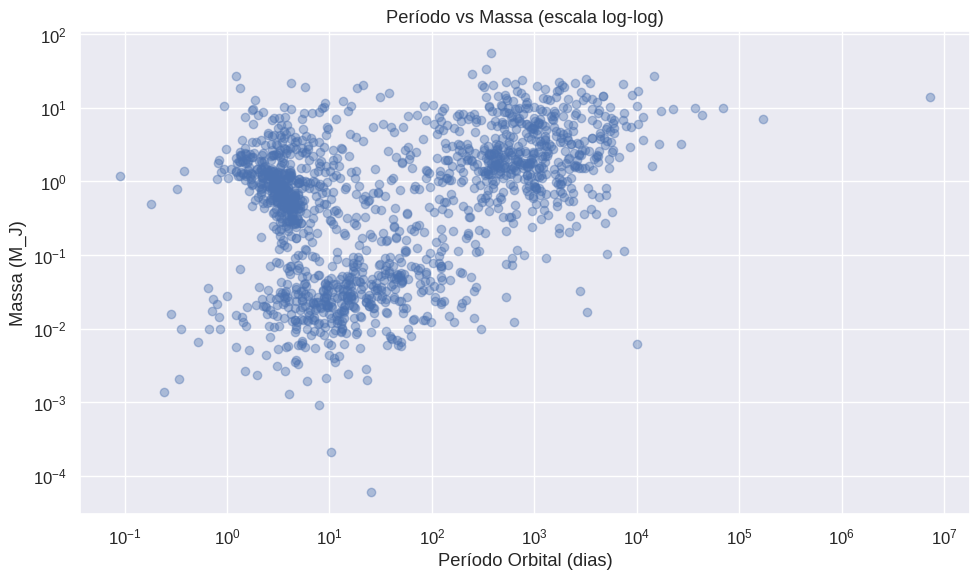

In [46]:

df_pm = df[['pl_orbper', 'pl_bmassj']].dropna()

plt.figure(figsize=(10,6))
plt.scatter(df_pm['pl_orbper'],
            df_pm['pl_bmassj'],
            alpha=0.4)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Período Orbital (dias)")
plt.ylabel("Massa (M_J)")
plt.title("Período vs Massa (escala log-log)")

plt.tight_layout()
plt.show()

### Interpretação

Observam-se múltiplos regimes bem definidos no espaço log–log.
As concentrações indicam forte estrutura imposta pelos métodos de detecção,
especialmente Radial Velocity e Transit.

A ausência de objetos em certas regiões sugere limites instrumentais,
não ausência física real de planetas.

## PASSO 4.3 — Período × Massa por Método de Detecção

Visualizamos o espaço log–log colorido por método para identificar
quais regimes observacionais são dominados por cada técnica.

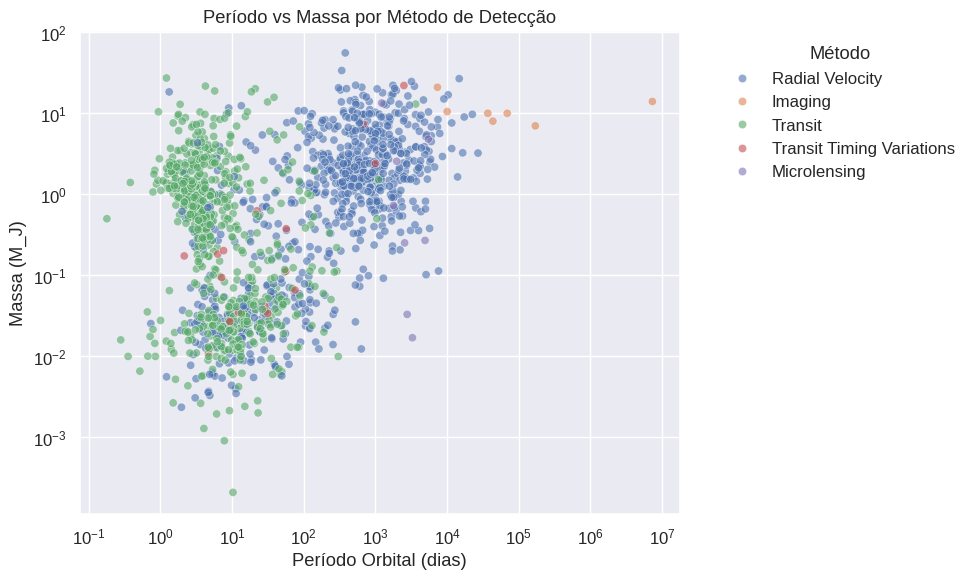

In [47]:

# Selecionar métodos mais frequentes para clareza visual
top_methods = df['pl_discmethod'].value_counts().head(5).index
df_plot = df[df['pl_discmethod'].isin(top_methods)][
    ['pl_orbper', 'pl_bmassj', 'pl_discmethod']
].dropna()

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df_plot,
    x='pl_orbper',
    y='pl_bmassj',
    hue='pl_discmethod',
    alpha=0.6
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Período Orbital (dias)")
plt.ylabel("Massa (M_J)")
plt.title("Período vs Massa por Método de Detecção")

plt.legend(title="Método", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

### Interpretação Observacional

Os métodos ocupam regiões claramente distintas do espaço log–log.

Transit concentra-se em órbitas curtas.
Radial Velocity domina massas elevadas.
Imaging aparece apenas em grandes separações orbitais.

O padrão confirma que o espaço de parâmetros observado é fortemente moldado pela técnica de detecção.

## PASSO 4.4 — Densidade Observacional no Espaço Período × Massa

Utilizamos hexbin para visualizar regiões de maior concentração
no espaço log–log, reduzindo sobreposição do scatter.

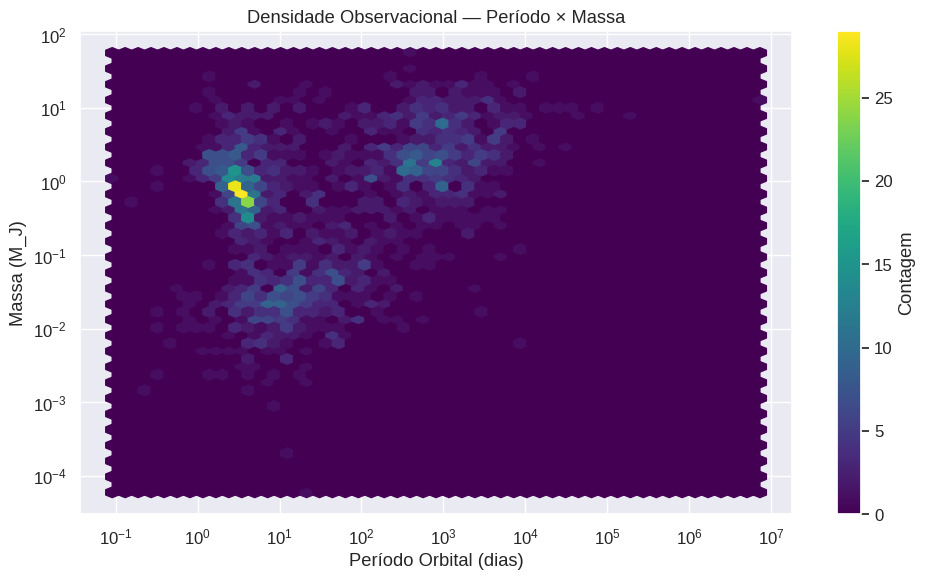

In [48]:

df_hex = df[['pl_orbper', 'pl_bmassj']].dropna()

plt.figure(figsize=(10,6))

plt.hexbin(
    df_hex['pl_orbper'],
    df_hex['pl_bmassj'],
    gridsize=50,
    xscale='log',
    yscale='log',
    cmap='viridis'
)

plt.colorbar(label='Contagem')

plt.xlabel("Período Orbital (dias)")
plt.ylabel("Massa (M_J)")
plt.title("Densidade Observacional — Período × Massa")

plt.tight_layout()
plt.show()

### Interpretação Observacional

A densidade revela múltiplos regimes bem definidos no espaço log–log.
O pico dominante em períodos curtos e massas jovianas reflete
forte sensibilidade observacional a Hot Jupiters.

As lacunas estruturais sugerem limites instrumentais
e não necessariamente ausência física de planetas.

## PASSO 4.5 — Densidade Observacional no Espaço Período × Raio

Investigamos a concentração observacional no espaço log–log
entre período orbital e raio planetário.

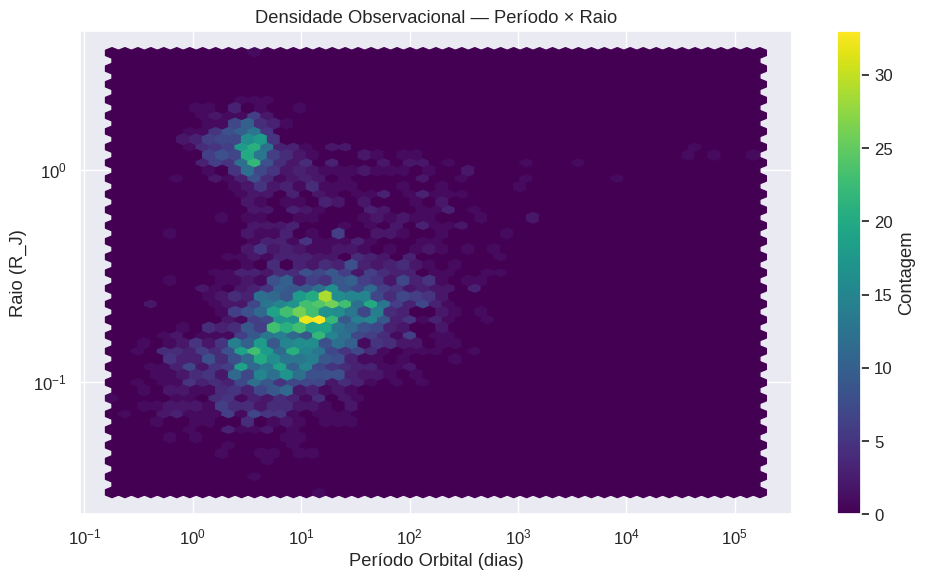

In [49]:

df_hex_r = df[['pl_orbper', 'pl_radj']].dropna()

plt.figure(figsize=(10,6))

plt.hexbin(
    df_hex_r['pl_orbper'],
    df_hex_r['pl_radj'],
    gridsize=50,
    xscale='log',
    yscale='log',
    cmap='viridis'
)

plt.colorbar(label='Contagem')

plt.xlabel("Período Orbital (dias)")
plt.ylabel("Raio (R_J)")
plt.title("Densidade Observacional — Período × Raio")

plt.tight_layout()
plt.show()

### Interpretação Observacional Refinada

A densidade revela dois regimes dominantes: Super-Terras/Netunos
em períodos curtos-intermediários e Hot Jupiters em períodos muito curtos.

A estrutura observada reflete fortemente a sensibilidade geométrica
do método Transit e não necessariamente a distribuição intrínseca da população planetária.

## PASSO 4.6 — Massa Estelar × Período Orbital

Exploramos como o período orbital se distribui em função
da massa da estrela hospedeira.

Objetivo: avaliar dependência observacional entre propriedades estelares
e regimes orbitais detectados.

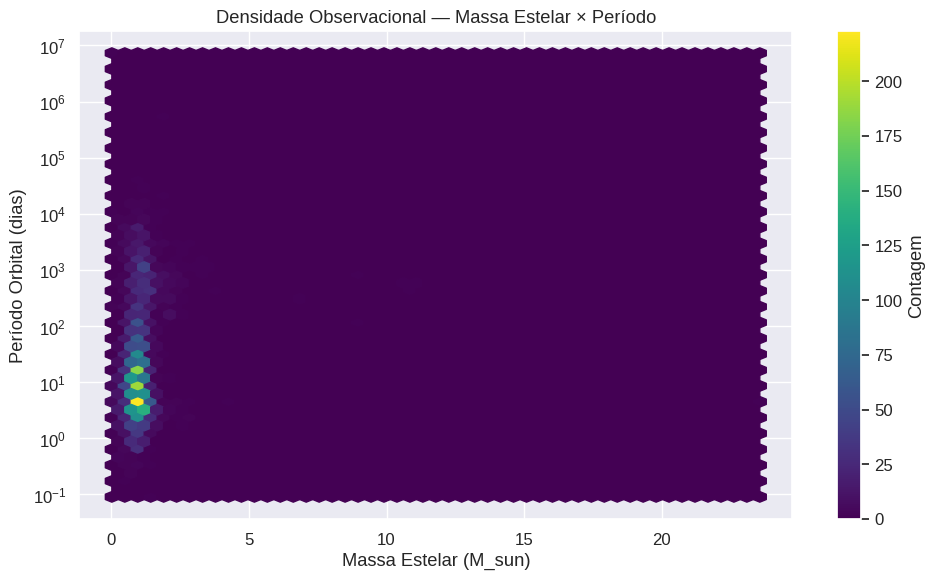

In [50]:

df_star = df[['st_mass', 'pl_orbper']].dropna()

plt.figure(figsize=(10,6))

plt.hexbin(
    df_star['st_mass'],
    df_star['pl_orbper'],
    gridsize=50,
    yscale='log',
    cmap='viridis'
)

plt.colorbar(label='Contagem')

plt.xlabel("Massa Estelar (M_sun)")
plt.ylabel("Período Orbital (dias)")
plt.title("Densidade Observacional — Massa Estelar × Período")

plt.tight_layout()
plt.show()

### Interpretação Observacional Refinada

As detecções concentram-se fortemente em estrelas próximas à massa solar,
refletindo seleção observacional e estratégias instrumentais.

Não se observa correlação estrutural forte entre massa estelar
e período orbital detectado dentro do regime amostrado.

## PASSO 4.7 — Distribuição das Incertezas Observacionais

Analisamos as incertezas associadas ao período orbital e à massa planetária
para avaliar como erros instrumentais influenciam o espaço de parâmetros observado.

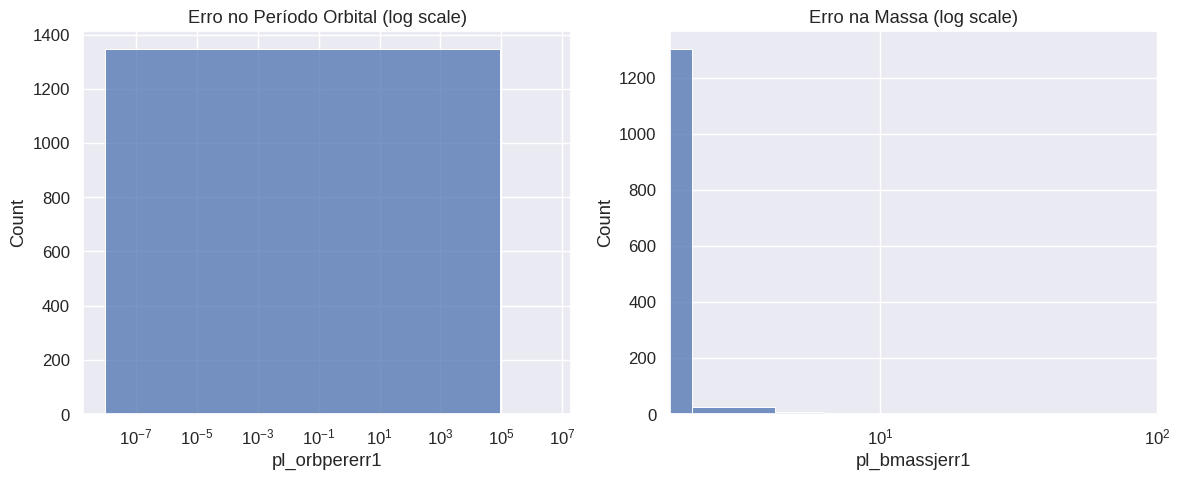

In [52]:

df_err = df[['pl_orbpererr1', 'pl_bmassjerr1']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Erro no período (log)
sns.histplot(df_err['pl_orbpererr1'], bins=40, ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_title("Erro no Período Orbital (log scale)")

# Erro na massa (log)
sns.histplot(df_err['pl_bmassjerr1'], bins=40, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title("Erro na Massa (log scale)")

plt.tight_layout()
plt.show()

### Interpretação Observacional Refinada

Os períodos orbitais apresentam alta precisão na maioria dos casos,
enquanto massas exibem maior dispersão de erro.

Isso indica que o espaço de parâmetros é moldado não apenas pela detecção,
mas também pela precisão diferencial das medições.

## 8.6 — Síntese dos Padrões Observacionais

Nesta seção integramos os resultados obtidos nas análises anteriores,
consolidando os regimes observacionais identificados e distinguindo
padrões robustos de efeitos dominados por viés instrumental.

### Regimes Observacionais Identificados

1. Regime de períodos curtos e massas/raios jovianos
   - Forte presença de Hot Jupiters (planetas gigantes gasosos muito próximos de suas estrelas)
   - Alta contribuição dos métodos Transit (detecção por diminuição periódica do brilho da estrela) e Radial Velocity (detecção pelo movimento da estrela causado pela gravidade do planeta).

2. Regime de períodos curtos-intermediários e raios menores
   - Super-Terras e Netunos
   - Dominância clara do método Transit(detecção pela diminuição periódica do brilho da estrela quando o planeta passa à sua frente).

3. Regime de períodos longos e massas elevadas
   - Associado principalmente ao método Radial Velocity(detecção baseada na oscilação da estrela causada pela gravidade do planeta).
   - Imaging restrito a grandes separações

### Padrões Robustos

- Concentração estrutural em períodos curtos
- Separação clara entre domínios ocupados por cada método
- Alta precisão nas medições de período

### Padrões Dominados por Viés

- Sub-representação de planetas de baixa massa em órbitas longas
- Forte concentração em estrelas próximas à massa solar
- Lacunas estruturais associadas à sensibilidade instrumental

### Consolidação

O espaço de parâmetros observado não representa
a distribuição intrínseca da população planetária,
mas sim a interação entre propriedades físicas detectáveis
e limitações instrumentais dos métodos empregados.

## 9 — Resposta à Pergunta Central

A análise exploratória revela que os padrões observacionais presentes
no catálogo de exoplanetas confirmados são fortemente moldados pela
interação entre propriedades físicas detectáveis e a evolução dos
métodos de detecção astronômica.

O espaço de parâmetros amostrado apresenta regimes bem definidos,
com forte concentração em períodos curtos e massas/raios intermediários.
Esses regimes correspondem diretamente às regiões de maior sensibilidade
dos métodos Transit e Radial Velocity.

Observa-se também:

- Predominância de detecções em estrelas próximas à massa solar,
  refletindo seleção de alvos observacionais.

- Sub-representação sistemática de planetas de baixa massa
  em órbitas longas, indicando limites instrumentais.

- Alta precisão nas medições de período orbital,
  contrastando com maior dispersão nas medições de massa,
  evidenciando impacto diferencial da precisão instrumental.

Assim, o catálogo não deve ser interpretado como um retrato fiel
da população planetária subjacente, mas como um espaço observacional
condicionado por tecnologia, estratégia e sensibilidade geométrica.

Os padrões identificados emergem da interação entre física orbital
e capacidade instrumental disponível em cada método de detecção.

## 10 — Conclusão

Este projeto demonstrou como a Análise Exploratória de Dados pode
revelar a estrutura interna de um catálogo astronômico sem recorrer
a modelos preditivos ou técnicas de machine learning.

Os regimes identificados no espaço de período, massa e raio
não representam diretamente a distribuição intrínseca de exoplanetas,
mas sim o resultado da interação entre física orbital e limitações
instrumentais dos métodos de detecção.

A predominância de períodos curtos, a concentração em estrelas
tipo solar e a assimetria na distribuição de massas são reflexos
da sensibilidade geométrica do método Transit e das características
do método Radial Velocity.

Além disso, a análise das incertezas evidenciou que diferentes
parâmetros possuem níveis distintos de precisão, influenciando
a forma como interpretamos o espaço observacional.

Assim, compreender o processo observacional é tão importante
quanto analisar os dados em si. A interpretação correta de
catálogos astronômicos exige reconhecer que cada ponto detectado
carrega a assinatura do instrumento que o revelou.